In [0]:
!wget https://databricks-workspace-stack-lambdazipsbucket-sp4p2g1ogzsj.s3.ap-south-1.amazonaws.com/CTR_predcition/train.gz

--2023-03-10 18:24:38--  https://databricks-workspace-stack-lambdazipsbucket-sp4p2g1ogzsj.s3.ap-south-1.amazonaws.com/CTR_predcition/train.gz
Resolving databricks-workspace-stack-lambdazipsbucket-sp4p2g1ogzsj.s3.ap-south-1.amazonaws.com (databricks-workspace-stack-lambdazipsbucket-sp4p2g1ogzsj.s3.ap-south-1.amazonaws.com)... 52.219.160.46
Connecting to databricks-workspace-stack-lambdazipsbucket-sp4p2g1ogzsj.s3.ap-south-1.amazonaws.com (databricks-workspace-stack-lambdazipsbucket-sp4p2g1ogzsj.s3.ap-south-1.amazonaws.com)|52.219.160.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1117527809 (1.0G) [application/x-gzip]
Saving to: ‘train.gz’

train.gz            100%[===================>]   1.04G  76.1MB/s    in 13s     

2023-03-10 18:24:51 (82.9 MB/s) - ‘train.gz’ saved [1117527809/1117527809]



In [0]:
!gunzip "train.gz"

In [0]:
!ls

azure  eventlogs  hadoop_accessed_config.lst  preload_class.lst  train.gz
conf   ganglia	  logs			      train


In [0]:
filepath = "file:///databricks/driver/train"

In [0]:
train_df = spark.read.csv(filepath,header =True,inferSchema=True)

In [0]:
print("no of rows:",train_df.count())
print("no of columns:",len(train_df.columns))

no of rows: 40428967
no of columns: 24


In [0]:
display(train_df.head(10))

id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
1000009418151094273.000000000000000000,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
10000169349117863715.000000000000000000,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
10000371904215119486.000000000000000000,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
10000640724480838376.000000000000000000,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
10000679056417042096.000000000000000000,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
10000720757801103869.000000000000000000,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
10000724729988544911.000000000000000000,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b264c159,be6db1d7,1,0,20362,320,50,2333,0,39,-1,157
10000918755742328737.000000000000000000,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e6f67278,be74e6fe,1,0,20632,320,50,2374,3,39,-1,23
10000949271186029916.000000000000000000,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,37e8da74,5db079b5,1,2,15707,320,50,1722,0,35,-1,79
10001264480619467364.000000000000000000,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0,21689,320,50,2496,3,167,100191,23


In [0]:
train_df.dtypes

Out[13]: [('id', 'decimal(20,0)'),
 ('click', 'int'),
 ('hour', 'int'),
 ('C1', 'int'),
 ('banner_pos', 'int'),
 ('site_id', 'string'),
 ('site_domain', 'string'),
 ('site_category', 'string'),
 ('app_id', 'string'),
 ('app_domain', 'string'),
 ('app_category', 'string'),
 ('device_id', 'string'),
 ('device_ip', 'string'),
 ('device_model', 'string'),
 ('device_type', 'int'),
 ('device_conn_type', 'int'),
 ('C14', 'int'),
 ('C15', 'int'),
 ('C16', 'int'),
 ('C17', 'int'),
 ('C18', 'int'),
 ('C19', 'int'),
 ('C20', 'int'),
 ('C21', 'int')]

In [0]:
columns = train_df.columns
for col_name in columns:
    na_count = train_df.filter(train_df[col_name].isNull()).count()
    print(col_name,":",na_count)

id : 0
click : 0
hour : 0
C1 : 0
banner_pos : 0
site_id : 0
site_domain : 0
site_category : 0
app_id : 0
app_domain : 0
app_category : 0
device_id : 0
device_ip : 0
device_model : 0
device_type : 0
device_conn_type : 0
C14 : 0
C15 : 0
C16 : 0
C17 : 0
C18 : 0
C19 : 0
C20 : 0
C21 : 0


In [0]:
from pyspark.sql.functions import countDistinct
columns = train_df.columns
for col_name in columns:
    print(col_name,":",train_df.select(countDistinct(col_name)).show())


+------------------+
|count(DISTINCT id)|
+------------------+
|          40428967|
+------------------+

id : None
+---------------------+
|count(DISTINCT click)|
+---------------------+
|                    2|
+---------------------+

click : None
+--------------------+
|count(DISTINCT hour)|
+--------------------+
|                 240|
+--------------------+

hour : None
+------------------+
|count(DISTINCT C1)|
+------------------+
|                 7|
+------------------+

C1 : None
+--------------------------+
|count(DISTINCT banner_pos)|
+--------------------------+
|                         7|
+--------------------------+

banner_pos : None
+-----------------------+
|count(DISTINCT site_id)|
+-----------------------+
|                   4737|
+-----------------------+

site_id : None
+---------------------------+
|count(DISTINCT site_domain)|
+---------------------------+
|                       7745|
+---------------------------+

site_domain : None
+-------------------------

In [0]:
import pandas as pd
import random

In [0]:
random.seed(4321)
pandas_df = pd.read_csv(filepath, 
           skiprows=lambda x: x > 0 and random.random() >=0.10)

In [0]:
pandas_df.shape

Out[17]: (4042442, 24)

In [0]:
pandas_df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
2,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
3,10007944429976961145,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
4,10009147085943364421,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17037,320,50,1934,2,39,-1,16
5,10009699694430474960,1,14102100,1005,0,4dd0a958,79cf0c8d,f028772b,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
6,10010485868773711631,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
7,10011205200760015892,0,14102100,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,...,1,0,17212,320,50,1887,3,39,100202,23
8,10013846047025246486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,100083,79
9,10014285064795240866,1,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21682,320,50,2496,3,167,100191,23


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
pandas_df['click'].value_counts()/len(pandas_df)

Out[21]: 0    0.830333
1    0.169667
Name: click, dtype: float64

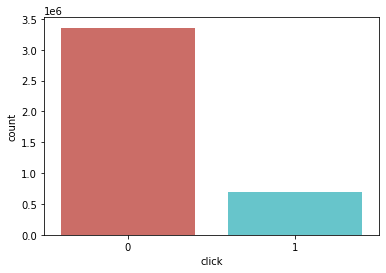

In [0]:
sns.countplot(x='click',data=pandas_df, palette='hls')
plt.show();

In [0]:
pandas_df['hour'] = pd.to_datetime(pandas_df['hour'], format='%y%m%d%H')

In [0]:
pandas_df.hour.describe()

<command-1019061131324727>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pandas_df.hour.describe()
Out[23]: count                 4042442
unique                    240
top       2014-10-22 09:00:00
freq                    45129
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

Out[24]: Text(0.5, 1.0, 'click trends by hour of day')

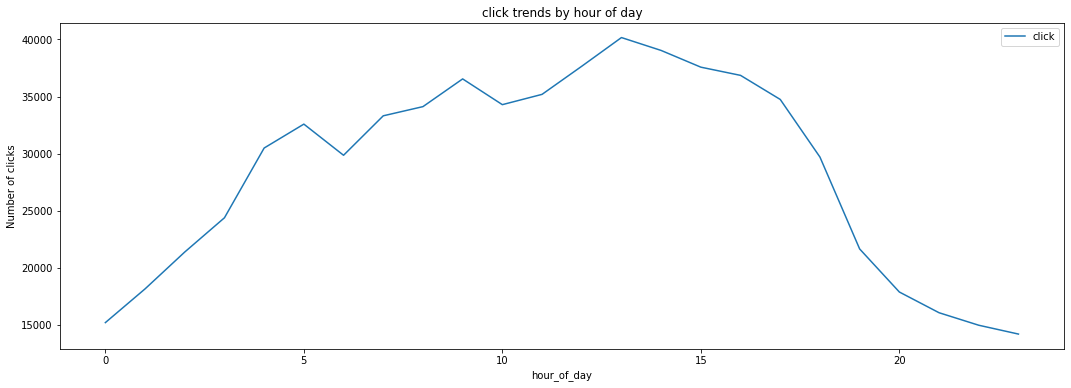

In [0]:
pandas_df['hour_of_day'] = pandas_df.hour.apply(lambda x: x.hour)
pandas_df.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(18,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day')

Out[25]: Text(0.5, 1.0, 'Hourly impressions vs. clicks')

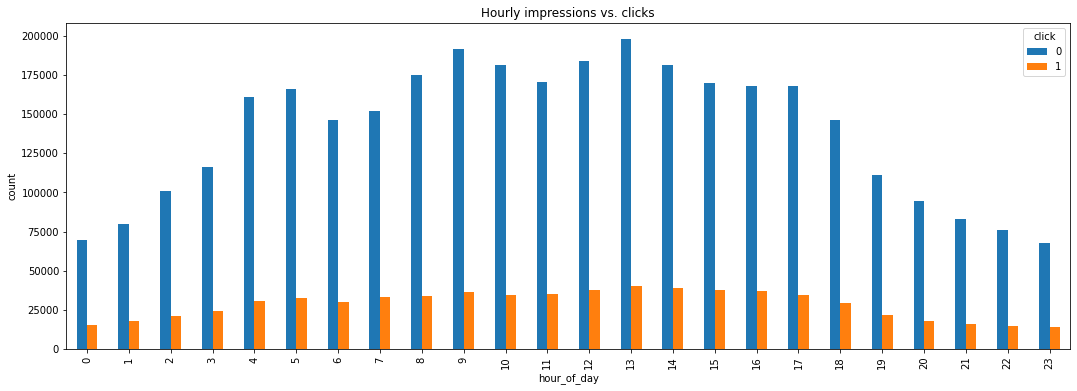

In [0]:
pandas_df.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(18,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks')

In [0]:
print(pandas_df.C1.value_counts()/len(pandas_df))

1005    0.918931
1002    0.054728
1010    0.022321
1012    0.002770
1007    0.000869
1001    0.000235
1008    0.000146
Name: C1, dtype: float64


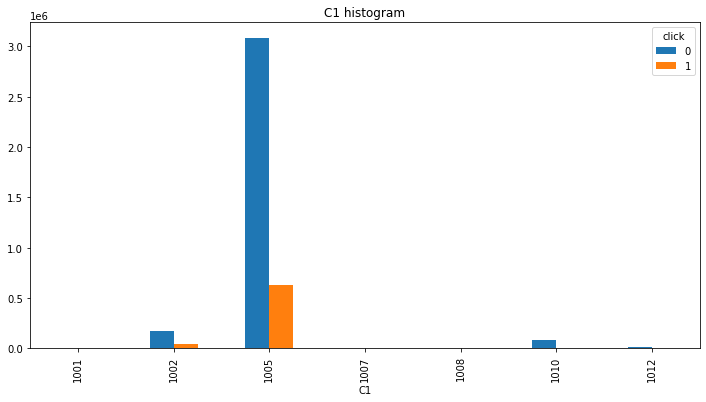

In [0]:
pandas_df.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

In [0]:
print(pandas_df.banner_pos.value_counts()/len(pandas_df))

0    0.720105
1    0.278125
7    0.001056
2    0.000331
4    0.000186
5    0.000146
3    0.000051
Name: banner_pos, dtype: float64


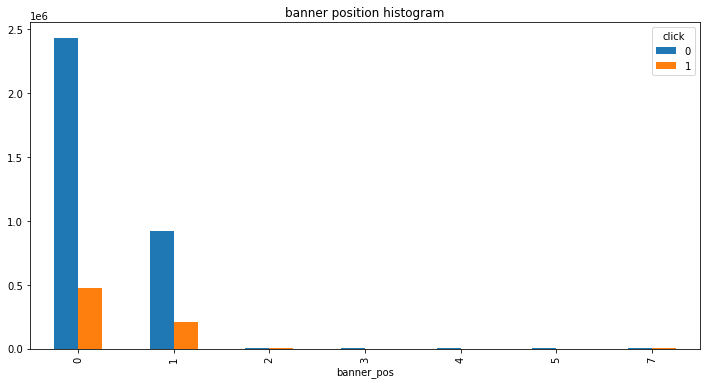

In [0]:
pandas_df.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

In [0]:
print('The impressions by device types')
print((pandas_df.device_type.value_counts()/len(pandas_df)))

The impressions by device types
1    9.229500e-01
0    5.472806e-02
4    1.911394e-02
5    3.207220e-03
2    7.421257e-07
Name: device_type, dtype: float64


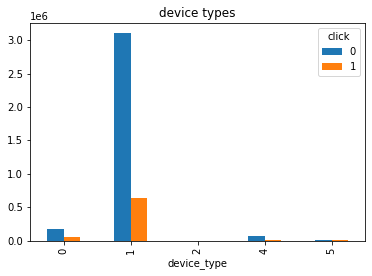

In [0]:
pandas_df[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

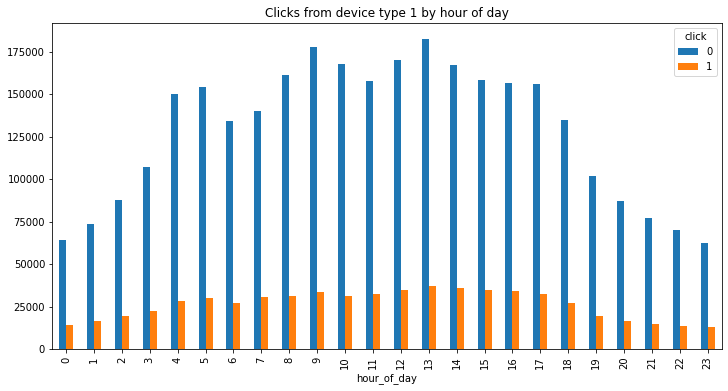

In [0]:
pandas_df[pandas_df['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

In [0]:
train_df.groupBy("click").count().show()

+-----+--------+
|click|   count|
+-----+--------+
|    1| 6865066|
|    0|33563901|
+-----+--------+



In [0]:
sample_df = train_df.sampleBy("click", {0: 0.03, 1: 0.15},0)

In [0]:
print("no of rows:",sample_df.count())
print("no of columns:",len(sample_df.columns))

no of rows: 2035465
no of columns: 24


In [0]:
sample_df.groupBy("click").count().show()

+-----+-------+
|click|  count|
+-----+-------+
|    1|1029135|
|    0|1006330|
+-----+-------+



In [0]:
sample_df = sample_df.drop('id')

In [0]:
train,test = sample_df.randomSplit([0.7,0.3],seed=5)

In [0]:
from pyspark.ml.feature import StringIndexer 

In [0]:
cols = train.columns
print(cols)

['click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


In [0]:
categoricalCols = cols[4:13]
print(categoricalCols)

['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


In [0]:
stringIndexer = StringIndexer(inputCols=categoricalCols, outputCols=[x + "Index" for x in categoricalCols]) 

In [0]:
stringIndexerModel_train = stringIndexer.fit(train)
train_stringindexer = stringIndexerModel_train.transform(train)

In [0]:
stringIndexerModel_test = stringIndexer.fit(test)
test_stringindexer = stringIndexerModel_test.transform(test)

In [0]:
print(stringIndexer.getOutputCols())

['site_idIndex', 'site_domainIndex', 'site_categoryIndex', 'app_idIndex', 'app_domainIndex', 'app_categoryIndex', 'device_idIndex', 'device_ipIndex', 'device_modelIndex']


In [0]:
from pyspark.ml.feature import VectorAssembler
numericalCols = cols[1:4]+cols[13:23]
assemblerInputs = [c + "Index" for c in categoricalCols] + numericalCols
print(assemblerInputs)
vecAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

['site_idIndex', 'site_domainIndex', 'site_categoryIndex', 'app_idIndex', 'app_domainIndex', 'app_categoryIndex', 'device_idIndex', 'device_ipIndex', 'device_modelIndex', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


In [0]:
train_data = vecAssembler.transform(train_stringindexer)

In [0]:
display(train_data.head(5))

click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,site_idIndex,site_domainIndex,site_categoryIndex,app_idIndex,app_domainIndex,app_categoryIndex,device_idIndex,device_ipIndex,device_modelIndex,features
0,14102100,1001,0,51a8ceda,c4e18dd6,bcf865d9,ecad2386,7801e8d9,07d7df22,cb4cff7c,6d36c36b,f07e20f8,1,0,20153,320,50,2307,3,163,100020,61,797.0,0.0,16.0,0.0,0.0,0.0,163930.0,403246.0,21.0,"Map(vectorType -> dense, length -> 22, values -> List(797.0, 0.0, 16.0, 0.0, 0.0, 0.0, 163930.0, 403246.0, 21.0, 1.41021E7, 1001.0, 0.0, 1.0, 0.0, 20153.0, 320.0, 50.0, 2307.0, 3.0, 163.0, 100020.0, 61.0))"
0,14102100,1002,0,15a497fe,277e7114,50e219e0,ecad2386,7801e8d9,07d7df22,e628d3cb,82941d01,68df2e72,0,0,15700,300,50,1722,0,35,100084,79,119.0,106.0,0.0,0.0,0.0,0.0,183035.0,6538.0,824.0,"Map(vectorType -> dense, length -> 22, values -> List(119.0, 106.0, 0.0, 0.0, 0.0, 0.0, 183035.0, 6538.0, 824.0, 1.41021E7, 1002.0, 0.0, 0.0, 0.0, 15700.0, 300.0, 50.0, 1722.0, 0.0, 35.0, 100084.0, 79.0))"
0,14102100,1002,0,15d93b0b,dd7026ee,50e219e0,ecad2386,7801e8d9,07d7df22,96955efc,72552de0,911a3c09,0,0,21681,320,50,2496,3,167,-1,23,191.0,224.0,0.0,0.0,0.0,0.0,126610.0,415252.0,74.0,"Map(vectorType -> dense, length -> 22, values -> List(191.0, 224.0, 0.0, 0.0, 0.0, 0.0, 126610.0, 415252.0, 74.0, 1.41021E7, 1002.0, 0.0, 0.0, 0.0, 21681.0, 320.0, 50.0, 2496.0, 3.0, 167.0, -1.0, 23.0))"
0,14102100,1002,0,1ee69d19,1e0acfb4,50e219e0,ecad2386,7801e8d9,07d7df22,62703f53,ca48dd15,08ac11ab,0,0,15908,320,50,1752,3,297,100081,82,211.0,31.0,0.0,0.0,0.0,0.0,89840.0,2081.0,48.0,"Map(vectorType -> dense, length -> 22, values -> List(211.0, 31.0, 0.0, 0.0, 0.0, 0.0, 89840.0, 2081.0, 48.0, 1.41021E7, 1002.0, 0.0, 0.0, 0.0, 15908.0, 320.0, 50.0, 1752.0, 3.0, 297.0, 100081.0, 82.0))"
0,14102100,1002,0,207ceda8,399001a5,50e219e0,ecad2386,7801e8d9,07d7df22,1e081f15,ba10882d,d5cf0423,0,0,17081,320,50,1921,3,47,-1,23,181.0,177.0,0.0,0.0,0.0,0.0,7483.0,583838.0,1918.0,"Map(vectorType -> dense, length -> 22, values -> List(181.0, 177.0, 0.0, 0.0, 0.0, 0.0, 7483.0, 583838.0, 1918.0, 1.41021E7, 1002.0, 0.0, 0.0, 0.0, 17081.0, 320.0, 50.0, 1921.0, 3.0, 47.0, -1.0, 23.0))"


In [0]:
test_data = vecAssembler.transform(test_stringindexer)

In [0]:
from pyspark.ml.classification import LogisticRegression 
lr = LogisticRegression(featuresCol="features", labelCol="click", regParam=1.0)

In [0]:
lr_model = lr.fit(train_data)

In [0]:
lr_predict = lr_model.transform(test_data)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
bcEvaluator = BinaryClassificationEvaluator(rawPredictionCol = "rawPrediction",labelCol = "click",metricName="areaUnderROC")
AROC_lr = bcEvaluator.evaluate(lr_predict)
print(f"Area under ROC curve: {AROC_lr}")


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

mcEvaluator = MulticlassClassificationEvaluator(predictionCol = "prediction",labelCol = "click",metricName="accuracy")
Acc_lr = mcEvaluator.evaluate(lr_predict)
print(f"Accuracy: {Acc_lr}")

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

In [0]:
dt = DecisionTreeClassifier(labelCol = "click",featuresCol = "features", maxBins=3036707)

In [0]:
dt_model = dt.fit(train_data)

In [0]:
dt_predict = dt_model.transform(test_data) 

In [0]:
AROC_dt = bcEvaluator.evaluate(dt_predict)
print(f"Area under ROC curve: {AROC_dt}")

Area under ROC curve: 0.5029606094646019


In [0]:
Acc_dt = mcEvaluator.evaluate(dt_predict)
print(f"Accuracy: {Acc_dt}")

Accuracy: 0.5101115874210543


In [0]:
from pyspark.ml.classification import RandomForestClassifier

In [0]:
rfc= RandomForestClassifier(numTrees=50, maxDepth=3, labelCol='click', seed=42, featuresCol='features', maxBins=2000000)

In [0]:
rfc_model= rfc.fit(train_data)

In [0]:
rf_predict= rfc_model.transform(test_data) 

In [0]:
AROC_rf = bcEvaluator.evaluate(rf_predict)
print(f"Area under ROC curve: {AROC_rf}")

Area under ROC curve: 0.5337564765439702


In [0]:
Acc_rf = mcEvaluator.evaluate(rf_predict)
print(f"Accuracy: {Acc_rf}")

Accuracy: 0.5120788824979458


In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10, featuresCol='features', labelCol='click', maxBins=2000000)
gbtModel = gbt.fit(train_data)
gb_predict = gbtModel.transform(test_data)

In [0]:
AROC_gbt = bcEvaluator.evaluate(gb_predict)
print(f"Area under ROC curve: {AROC_gbt}")

Area under ROC curve: 0.48787493719305636


In [0]:
Acc_gbt = mcEvaluator.evaluate(gb_predict)
print(f"Accuracy: {Acc_gbt}")

Accuracy: 0.49087921117502054


In [0]:
from pyspark.ml.classification import LinearSVC

In [0]:
lsvc = LinearSVC(labelCol="click",featuresCol='features' ,maxIter=50)
lsvc = lsvc.fit(train_data)
lsv_predict = lsvc.transform(test_data)

In [0]:
AROC_lsvm = bcEvaluator.evaluate(lsv_predict)
print(f"Area under ROC curve: {AROC_lsvm}")

Area under ROC curve: 0.6424983926825184


In [0]:
Acc_lsvm = mcEvaluator.evaluate(lsv_predict)
print(f"Accuracy: {Acc_lsvm}")

Accuracy: 0.600164338537387


In [0]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1.0, modelType="gaussian", featuresCol='features', labelCol='click')
model = nb.fit(train_data)
nb_predict = model.transform(test_data)

In [0]:
AROC_nb = bcEvaluator.evaluate(nb_predict)
print(f"Area under ROC curve: {AROC_nb}")

Area under ROC curve: 0.5188471076389451


In [0]:
Acc_nb = mcEvaluator.evaluate(nb_predict)
print(f"Accuracy: {Acc_nb}")

Accuracy: 0.5850451930977815


In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
 
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build())

In [0]:
# Create a 3-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=bcEvaluator, numFolds=3, parallelism = 4)
 
# Run cross validations. This step takes a few minutes and returns the best model found from the cross validation.
cvModel = cv.fit(train_data)
cvPredDF = cvModel.transform(test_data)

In [0]:
# Evaluate the model's performance based on area under the ROC curve and accuracy 
print(f"Area under ROC curve: {bcEvaluator.evaluate(cvPredDF)}")
print(f"Accuracy: {mcEvaluator.evaluate(cvPredDF)}")

Area under ROC curve: 0.642008849700958
Accuracy: 0.6009860312243221


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

In [0]:
y_test = np.array(cvPredDF.select("prediction").collect())
y_score = np.array(cvPredDF.select("click").collect())

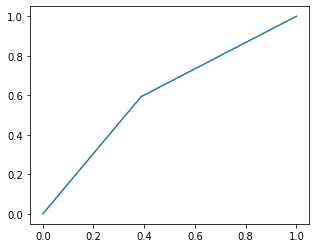

In [0]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.show()

In [0]:
! pip install koalas

     |████████████████████████████████| 390 kB 984 kB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-df9ff02d-7fec-41ff-b0a0-bec4b1f560e5/bin/python -m pip install --upgrade pip' command.


In [0]:
import databricks.koalas as ks
from sklearn.metrics import confusion_matrix, classification_report

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
Out[37]: <AxesSubplot:>

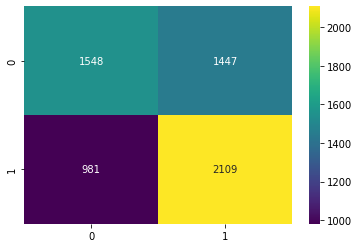

In [0]:
#convert spark dataframe to koalas dataframe
kdf_predictions = ks.DataFrame(cvPredDF)
cm = confusion_matrix(kdf_predictions['click'].to_numpy(),kdf_predictions['prediction'].to_numpy())
sns.heatmap(cm, annot=True, cmap='viridis',fmt='g')

In [0]:
display(classification_report(kdf_predictions['click'].values,kdf_predictions['prediction'].values))

/local_disk0/.ephemeral_nfs/envs/pythonEnv-df9ff02d-7fec-41ff-b0a0-bec4b1f560e5/lib/python3.9/site-packages/databricks/koalas/generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
'              precision    recall  f1-score   support\n\n           0       0.61      0.52      0.56      2995\n           1       0.59      0.68      0.63      3090\n\n    accuracy                           0.60      6085\n   macro avg       0.60      0.60      0.60      6085\nweighted avg       0.60      0.60      0.60      6085\n'